# EDA on Student_performance dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


In [ ]:
df= pd.read_csv("stud.csv")

In [ ]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
df.isnull().sum()    # no nan values

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [ ]:
df.isna().sum()  # another way

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [ ]:
df.duplicated().sum()    # no duplicates

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.describe()   # since minimum math score is 0 we can make an inference that there i is or  are a student dididnt worte or attempted the math exam

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [ ]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# Segregation of numerical and categorical data
numerical_features= [feature for feature in df.columns if df[feature].dtype!="O"]
categorical_features= [feature for feature in df.columns if df[feature].dtype=="O"]


In [ ]:
numerical_features

['math_score', 'reading_score', 'writing_score']

In [ ]:
categorical_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [ ]:
df["total_score"]= df["math_score"]+df["reading_score"]+df["writing_score"]
df["Average"]= df["total_score"]/3

In [ ]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


<Axes: xlabel='Average', ylabel='Count'>

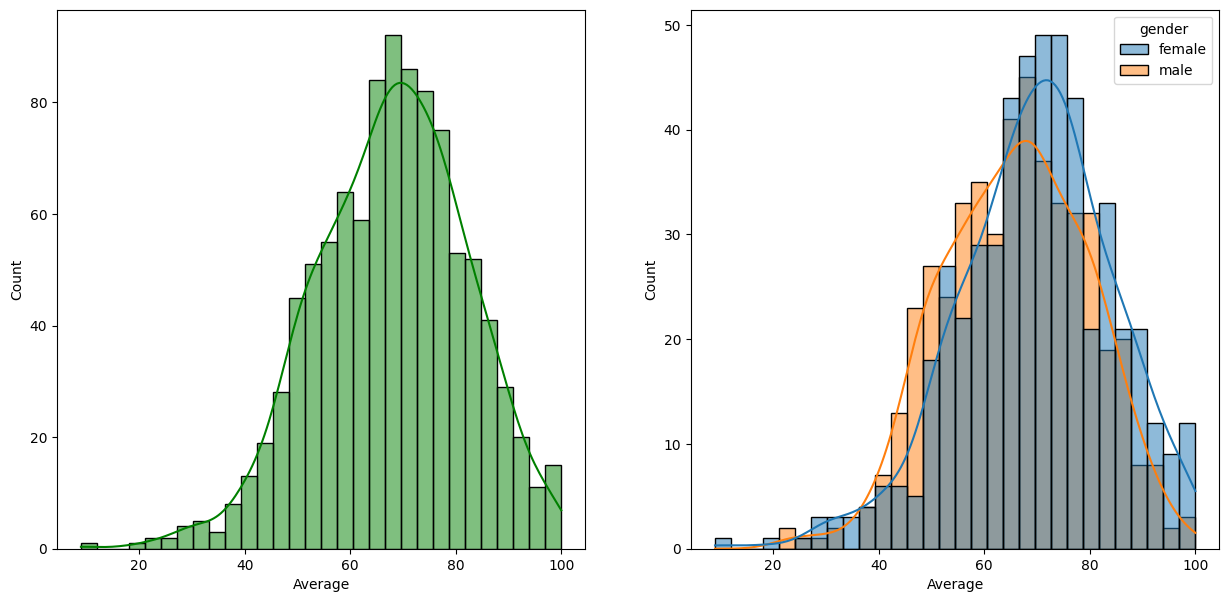

In [ ]:
# Visualization

fig, axis= plt.subplots(1, 2, figsize= (15, 7))
plt.subplot(121)
sns.histplot(data=df, x= "Average", bins= 30, kde= True, color= "g")
plt.subplot(122)
sns.histplot(data= df, x= "Average", bins= 30, kde= True, hue= "gender", color= "g")

## Insights
#Female students are performing better than male

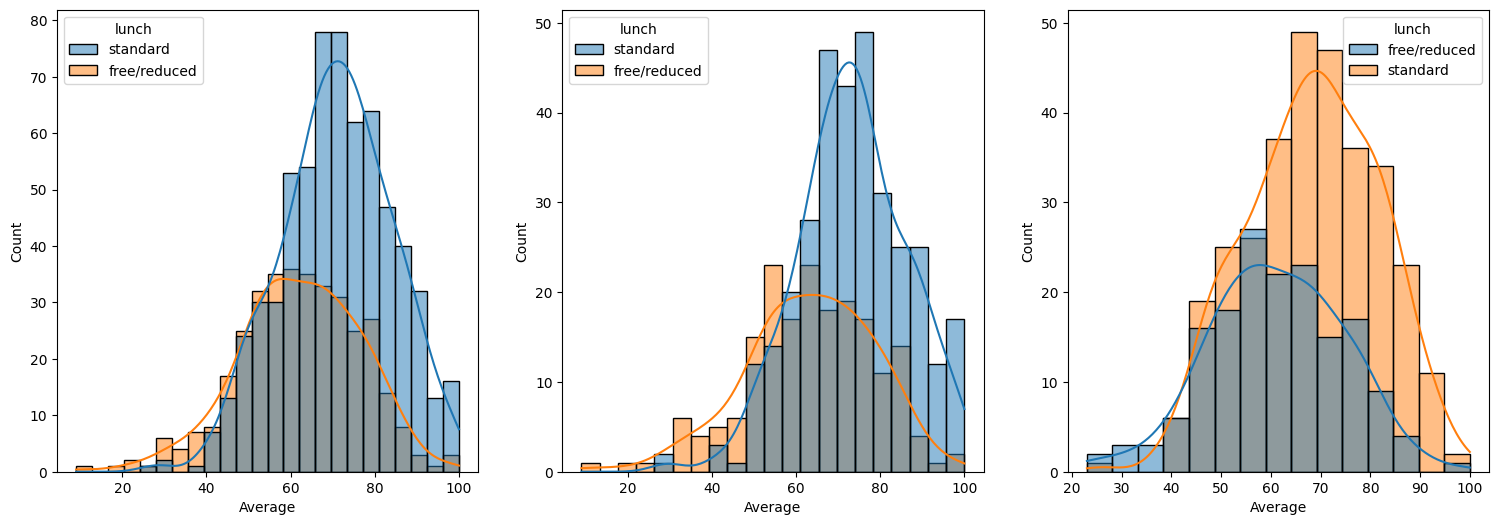

In [ ]:
plt.subplots(1, 3, figsize= (25, 6))
plt.subplot(141)
sns.histplot(data= df, x= "Average", kde= True, hue= "lunch")
plt.subplot(142)
sns.histplot(data= df[df.gender== "female"], x= "Average", kde= True, hue= "lunch")
plt.subplot(143)
sns.histplot(data= df[df.gender== "male"], x= "Average", kde= True, hue= "lunch")
plt.show()

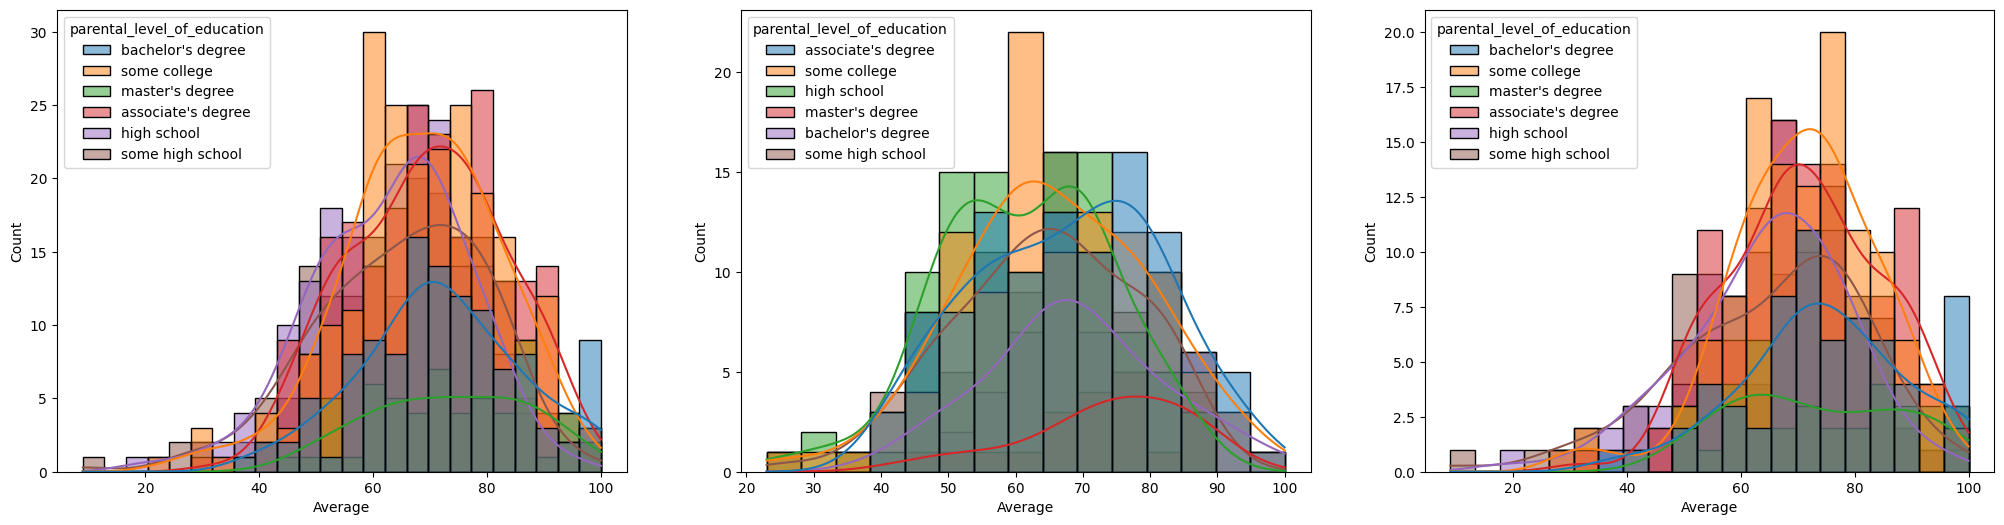

In [ ]:
plt.subplots(1, 3, figsize= (25, 6))
plt.subplot(131)
sns.histplot(data= df, x= "Average", kde= True, hue= "parental_level_of_education")
plt.subplot(132)
sns.histplot(data= df[df.gender== "male"], x= "Average", kde= True, hue= "parental_level_of_education")
plt.subplot(133)
sns.histplot(data= df[df.gender== "female"], x= "Average", kde= True, hue= "parental_level_of_education")

plt.show()


# Insights
1. In general the parental level of education doesnt help students much in performance
2. 2nd plot shows that parents who's degree is of associate's degree or master's degree thier male child tend to perfomr well in exam
3. 3rd plot shows that there is no effect of parental level of education in female child performance

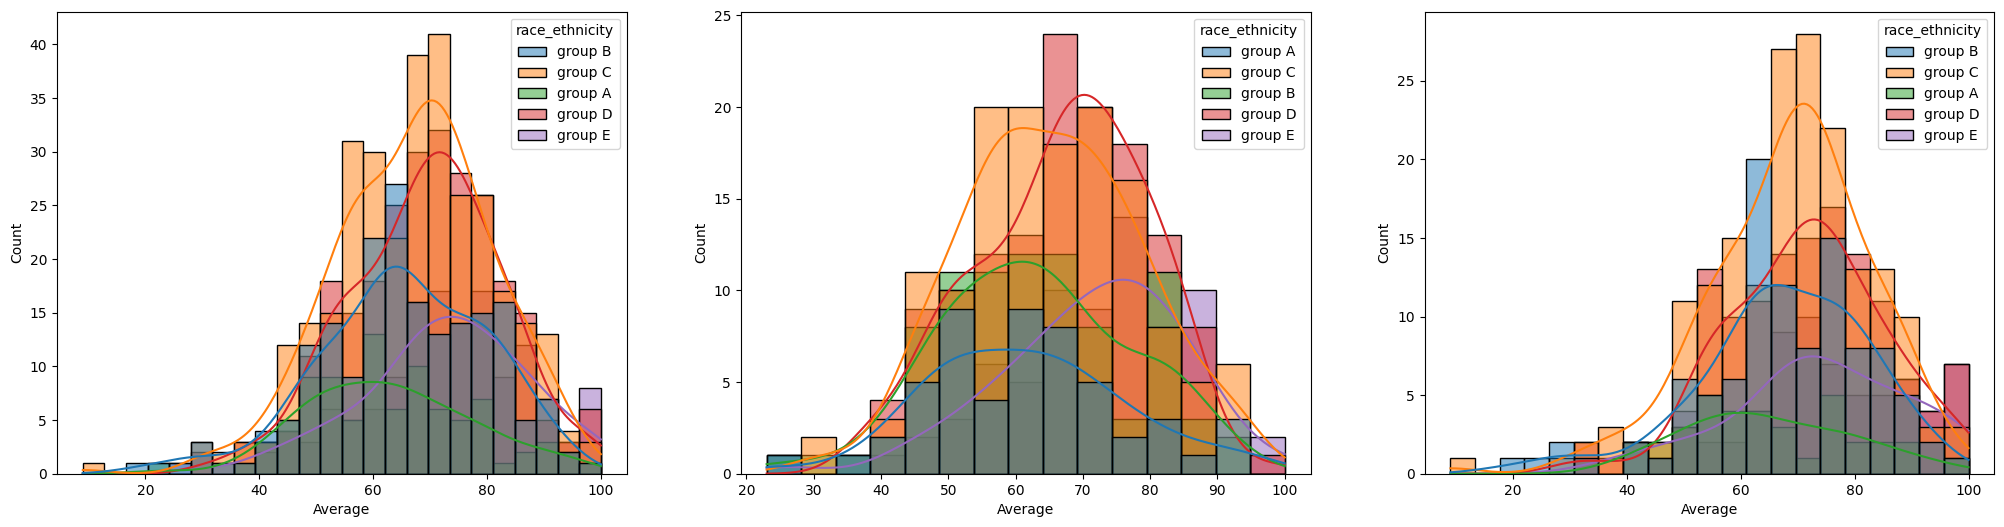

In [ ]:
plt.subplots(1, 3, figsize= (25, 6))
plt.subplot(131)
sns.histplot(data= df, x= "Average", kde= True, hue= "race_ethnicity")
plt.subplot(132)
sns.histplot(data= df[df.gender== "male"], x= "Average", kde= True, hue= "race_ethnicity")
plt.subplot(133)
sns.histplot(data= df[df.gender== "female"], x= "Average", kde= True, hue= "race_ethnicity")

plt.show()


Insights

1. students of group A and group B tends to perform poorly in exam
2. students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

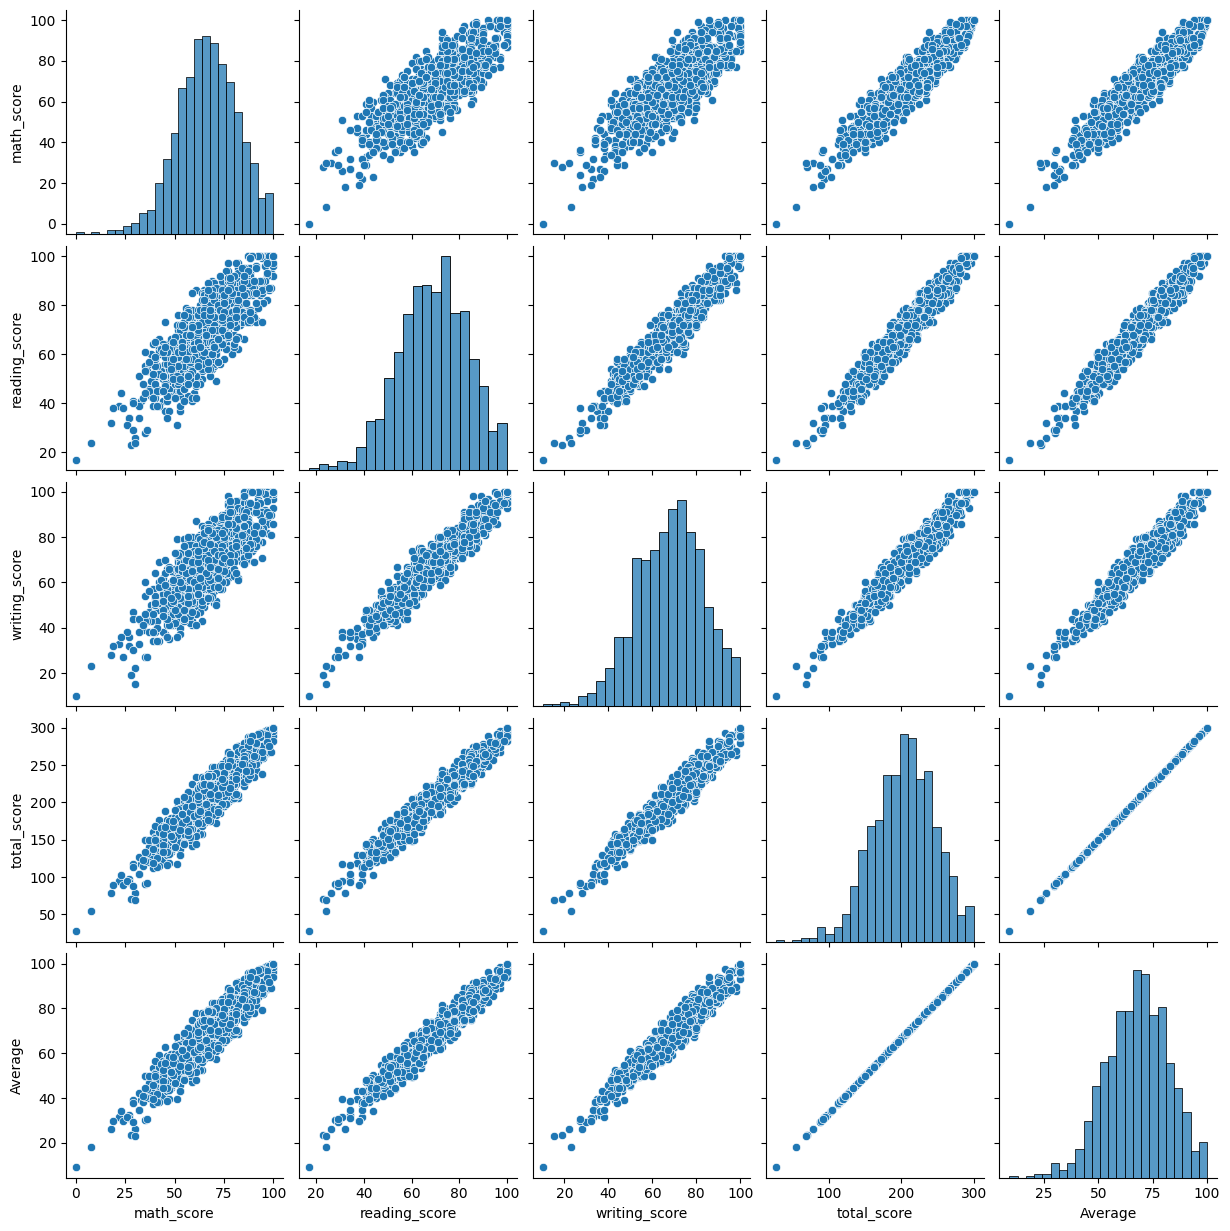

In [ ]:
sns.pairplot(df)

<Axes: >

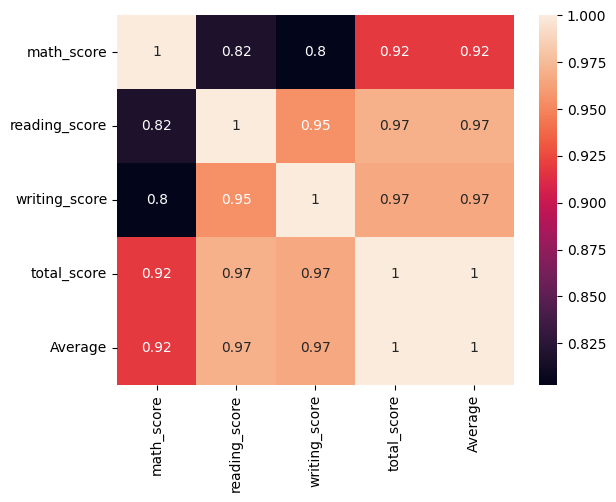

In [ ]:
sns.heatmap(df.corr(), annot= True)